# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
# creating a list
all_weather=[]
for ind,name in enumerate (cities):
    print (ind,name)
    
    respond=requests.get(query_url+name).json()
    try: 
        raw={'City':name,
             'Cloudiness':respond['clouds']['all'],
             'Country':respond['sys']['country'],
             'Humidity':respond['main']['humidity'],
             'Lat':respond['coord']['lat'],
             'Long':respond['coord']['lon'],
             'Max Temp':respond['main']['temp_max'],
             'Wind Speed': respond['wind']['speed']
            }
             
        all_weather.append(raw)
                 
    except: 
        print("NA")
        


0 ouallam
1 fortuna
2 san patricio
3 jamestown
4 yellowknife
5 guerrero negro
6 murray bridge
7 mataura
8 evensk
9 cape town
10 hithadhoo
11 barentsburg
NA
12 ushuaia
13 castro
14 saint-philippe
15 roald
16 hami
17 mar del plata
18 mount gambier
19 hakui
20 valle hermoso
21 rikitea
22 hermanus
23 kodiak
24 upernavik
25 sibirskiy
26 qaanaaq
27 barawe
NA
28 faya
29 port elizabeth
30 kapaa
31 tuktoyaktuk
32 serowe
33 lasa
34 ocean city
35 ostrovnoy
36 atherton
37 busselton
38 dingle
39 belushya guba
NA
40 ekhabi
41 maputo
42 albany
43 guarapari
44 camacha
45 thompson
46 chubbuck
47 svetlogorsk
48 illoqqortoormiut
NA
49 husavik
50 general roca
51 bredasdorp
52 saleaula
NA
53 taolanaro
NA
54 bluff
55 avarua
56 lebu
57 bayan
58 guiglo
59 abonnema
60 saint george
61 mosquera
62 longyearbyen
63 kavieng
64 karratha
65 kushmurun
66 airai
67 sisimiut
68 port augusta
69 urdzhar
NA
70 sorland
71 gat
72 goma
73 clyde river
74 darnah
75 saint-denis
76 tsihombe
NA
77 lorengau
78 meyungs
NA
79 nanortal

605 virginia beach
606 tete
607 morro bay
608 vaitape
609 leh
610 kangaatsiaq
611 bud
612 kayes
613 kasulu
614 west fargo
615 mount isa
616 iwanai
617 changji
618 te anau
619 golkoy
620 cayenne
621 baruun-urt
622 fayaoue
623 manicore
624 sur
625 tahta


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame(all_weather)
weather_df

,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind Speed
0,yellowknife,90,CA,97,62.4560,-114.3525,-2.55,5.66
1,sechura,73,PE,68,-5.5569,-80.8222,21.13,3.73
2,ushuaia,0,AR,49,-54.8000,-68.3000,7.81,8.75
3,punta arenas,0,CL,53,-53.1500,-70.9167,8.06,8.75
4,klaksvik,100,FO,85,62.2266,-6.5890,8.51,5.00
...,...,...,...,...,...,...,...,...
562,aripuana,12,BR,41,-9.1667,-60.6333,34.71,0.96
563,podor,54,MR,24,16.6527,-14.9587,35.62,7.61
564,sola,4,VU,67,-13.8833,167.5500,27.58,6.92
565,langsa,92,ID,89,4.4683,97.9683,24.64,0.89


In [6]:
# convert data into CSV
weather_df.to_csv("citiesc.csv", index = False)
weather_df.head(10)

,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind Speed
0,yellowknife,90,CA,97,62.4560,-114.3525,-2.55,5.66
1,sechura,73,PE,68,-5.5569,-80.8222,21.13,3.73
2,ushuaia,0,AR,49,-54.8000,-68.3000,7.81,8.75
3,punta arenas,0,CL,53,-53.1500,-70.9167,8.06,8.75
4,klaksvik,100,FO,85,62.2266,-6.5890,8.51,5.00
5,atuona,23,PF,71,-9.8000,-139.0333,24.95,5.59
6,beocin,0,RS,42,45.2083,19.7206,19.36,6.79
7,neiafu,75,TO,69,-18.6500,-173.9833,25.38,4.63
8,jamestown,90,US,97,42.0970,-79.2353,9.05,0.89
9,port hardy,1,CA,93,50.6996,-127.4199,6.00,2.06


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
#  Get the indices of cities that have humidity below 101%.
# city_weather is CLEAN
city_weather=weather_df.loc[weather_df['Humidity'] < 101]
city_weather.sort_values(by=['Humidity'], ascending=False)


,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind Speed
531,two hills,1,CA,100,53.7169,-111.7518,-3.51,5.66
141,clyde river,90,CA,100,70.4692,-68.5914,-0.87,6.69
208,bereznik,100,RU,100,62.8551,42.7072,3.52,1.40
241,matagami,1,CA,100,49.7502,-77.6328,-1.94,0.00
36,sattahip,40,TH,100,12.6664,100.9007,28.32,3.09
...,...,...,...,...,...,...,...,...
553,ayorou,48,NE,10,14.7308,0.9174,38.89,3.14
164,tessalit,29,ML,9,20.1986,1.0114,37.12,1.53
83,filingue,97,NE,8,14.3521,3.3168,38.59,4.97
391,kidal,61,ML,8,18.4411,1.4078,37.75,4.48


In [38]:
#  Get the indices of cities that have humidity over 100%.
clean_city_100plus=weather_df.loc[weather_df['Humidity'] > 100]
clean_city_100plus.count()

# no cities over 100% humidity and hence, nothing to reomove

City          0
Cloudiness    0
Country       0
Humidity      0
Lat           0
Long          0
Max Temp      0
Wind Speed    0
dtype: int64

In [41]:
# Calculating the quartile if Hunidity

quartile_df = city_weather['Humidity']
#quartile_df = weather_df.iloc[:,4] -trial
quartiles =quartile_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The median of Humidity: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 60.0
The upper quartile of Humidity is: 87.0
The median of Humidity: 75.0 
Values below 19.5 could be outliers.
Values above 127.5 could be outliers.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

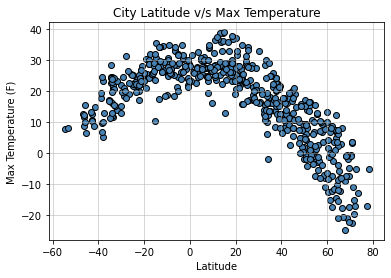

In [34]:
# Create Latitude vs. Temp Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude v/s Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

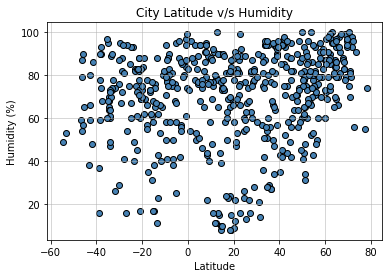

In [35]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude v/s Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

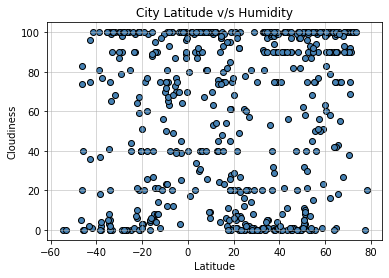

In [36]:
# Create Latitude vs. Cloud Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude v/s Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

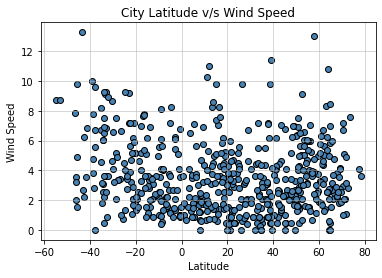

In [37]:
# Create Latitude vs. Windspeed Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude v/s Wind Speed")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [45]:
northern_df=city_weather.loc[city_weather['Lat'] >= 0]
southern_df=city_weather.loc[city_weather['Lat'] < 0]

northern_df

,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind Speed
0,yellowknife,90,CA,97,62.4560,-114.3525,-2.55,5.66
4,klaksvik,100,FO,85,62.2266,-6.5890,8.51,5.00
6,beocin,0,RS,42,45.2083,19.7206,19.36,6.79
8,jamestown,90,US,97,42.0970,-79.2353,9.05,0.89
9,port hardy,1,CA,93,50.6996,-127.4199,6.00,2.06
...,...,...,...,...,...,...,...,...
560,kifri,100,IQ,28,34.6959,44.9661,29.06,4.36
561,nogent-le-rotrou,100,FR,73,48.3333,1.0000,15.00,6.26
563,podor,54,MR,24,16.6527,-14.9587,35.62,7.61
565,langsa,92,ID,89,4.4683,97.9683,24.64,0.89


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7529849871594119


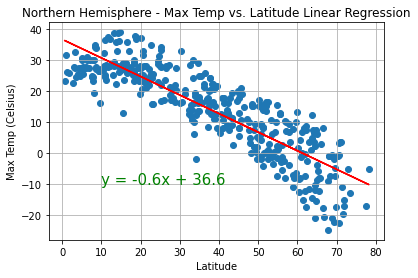

In [93]:
x_axis=northern_df['Lat']
y_axis=northern_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5359435945391416


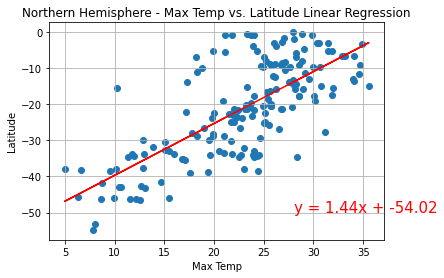

In [73]:
x_axis=southern_df['Max Temp']
y_axis=southern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(28,-50),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07649128526134702


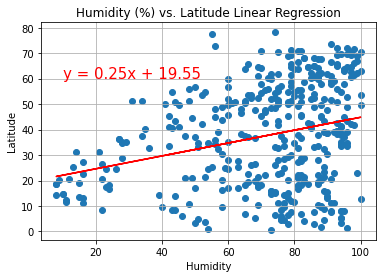

In [92]:
x_axis=northern_df['Humidity']
y_axis=northern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Humidity (%) vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00391700715757499


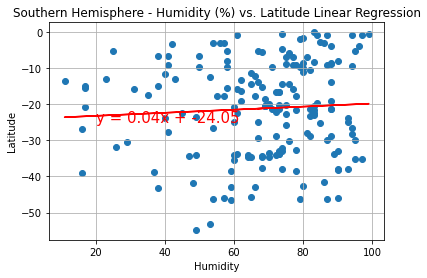

In [80]:
x_axis=southern_df['Humidity']
y_axis=southern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,-25),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015873132057930926


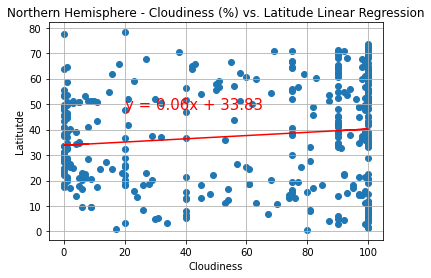

In [82]:
x_axis=northern_df['Cloudiness']
y_axis=northern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,48),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitutde')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04273716671858145


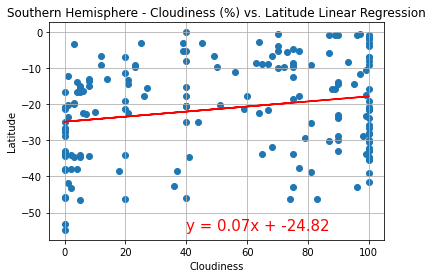

In [96]:
x_axis=southern_df['Cloudiness']
y_axis=southern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,-55),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13295065676403245


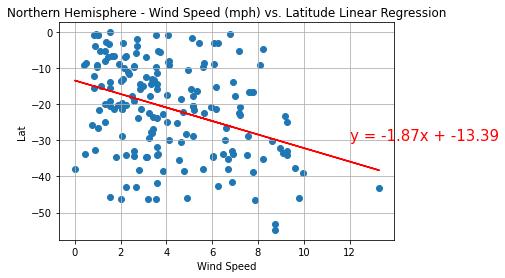

In [91]:
x_axis=southern_df['Wind Speed']
y_axis=southern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(12,-30),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13295065676403245


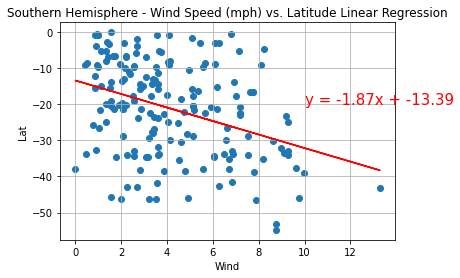

In [95]:
x_axis=southern_df['Wind Speed']
y_axis=southern_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Wind')
plt.ylabel('Lat')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#1) Strong negative correlation between latitude and max temperature for northern hemisphere.

#2) Moderate positive correlation between latitude and max temperature for southern hemisphere.

#3) There is a weak positive correlation between latitude and windspeed for northern hemisphere.